# Import 

In [236]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_validate, cross_val_score, learning_curve
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Collecte des Données

In [237]:
# Chargement du jeu de données pour Lyon
path = './listings.csv'
data_airbnb = pd.read_csv(path)

# Afficher la forme et les premières lignes
print("AirBnb dataset shape:", data_airbnb.shape)
data_airbnb.head()

AirBnb dataset shape: (84055, 79)


,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3109,https://www.airbnb.com/rooms/3109,20250606142312,2025-06-20,city scrape,zen and calm,Lovely Appartment with one bedroom with a Quee...,Good restaurants<br />very close the Montparna...,https://a0.muscache.com/pictures/miso/Hosting-...,3631,...,5.00,5.00,5.00,7511409139079,f,1,1,0,0,0.08
1,5396,https://www.airbnb.com/rooms/5396,20250606142312,2025-06-19,city scrape,Your perfect Paris studio on Île Saint-Louis,"Cozy, well-appointed and graciously designed s...","You are within walking distance to the Louvre,...",https://a0.muscache.com/pictures/52413/f9bf76f...,7903,...,4.85,4.95,4.59,7510402838018,f,1,1,0,0,2.32
2,7397,https://www.airbnb.com/rooms/7397,20250606142312,2025-06-20,city scrape,MARAIS - 2ROOMS APT - 2/4 PEOPLE,"VERY CONVENIENT, WITH THE BEST LOCATION !",NaN,https://a0.muscache.com/pictures/67928287/330b...,2626,...,4.89,4.94,4.74,7510400829623,f,1,1,0,0,2.20
3,7964,https://www.airbnb.com/rooms/7964,20250606142312,2025-06-18,previous scrape,Sunny apartment with balcony,"We are renting our a spacious, sunny fully fur...",NaN,https://a0.muscache.com/pictures/miso/Hosting-...,22155,...,5.00,5.00,5.00,7510903576564,f,1,1,0,0,0.03
4,9359,https://www.airbnb.com/rooms/9359,20250606142312,2025-06-18,city scrape,"Cozy, Central Paris: WALK or VELIB EVERYWHERE !",Location! Location! Location! Just bring your ...,NaN,https://a0.muscache.com/pictures/c2965945-061f...,28422,...,NaN,NaN,NaN,"Available with a mobility lease only (""bail mo...",f,1,1,0,0,NaN


# Prétraitement des Données


**affichage**

In [238]:
path = './listings.csv'

# Lecture du fichier CSV 
df = pd.read_csv(path)
df.columns.to_list()

['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'source',
 'name',
 'description',
 'neighborhood_overview',
 'picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'latitude',
 'longitude',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bathrooms_text',
 'bedrooms',
 'beds',
 'amenities',
 'price',
 'minimum_nights',
 'maximum_nights',
 'minimum_minimum_nights',
 'maximum_minimum_nights',
 'minimum_maximum_nights',
 'maximum_maximum_nights',
 'minimum_nights_avg_ntm',
 'maximum_nights_avg_ntm',
 'calendar_updated',
 'has_availability',
 'availability_30

**Sélection des colonnes**

In [239]:
df = pd.read_csv(path)
selected_cols = ['price','room_type','neighbourhood_cleansed','minimum_nights','number_of_reviews',
                 'review_scores_rating','beds','bedrooms','accommodates']
# Extraire les colonnes pertinentes
df_selected = df[selected_cols].copy()



**Nettoyage de la variable prix: suppression des symboles '$' et des virgules puis conversion en float**


In [240]:
df_selected['price'] = df_selected['price'].replace(r'[\$,]', '', regex=True).astype(float)

**Conversion des colonnes numériques et gestion des valeurs manquantes**

In [241]:
# review_scores_rating peut contenir des NaN; je remplaçe par la moyenne
num_cols = ['review_scores_rating','minimum_nights','number_of_reviews','beds','bedrooms','accommodates']
for col in num_cols:
    df_selected[col] = pd.to_numeric(df_selected[col], errors='coerce')

**Imputation des NaN par des statistiques (moyenne pour review_scores_rating, médiane pour d'autres)**


In [242]:
from numpy import nan

# review_scores_rating: moyenne
mean_rating = df_selected['review_scores_rating'].mean()
df_selected['review_scores_rating'] = df_selected['review_scores_rating'].fillna(mean_rating)

# Autres colonnes: médiane
for col in ['minimum_nights','number_of_reviews','beds','bedrooms','accommodates']:
    median_val = df_selected[col].median()
    df_selected[col] = df_selected[col].fillna(median_val)

**Suppression des doublons**

In [243]:
# Suppression des doublons
print("doubles avant suppression:", df_selected.duplicated().sum())
df_selected.drop_duplicates(inplace=True)

# Suppression des observations sans prix ou type de chambre
df_selected.dropna(subset=['price','room_type'], inplace=True)

doubles avant suppression: 10727


**Afficher un aperçu du jeu de données prétraité**


In [244]:
print("Shape after preprocessing:", df_selected.shape)
df_selected.head()

Shape after preprocessing: (53295, 9)


,price,room_type,neighbourhood_cleansed,minimum_nights,number_of_reviews,review_scores_rating,beds,bedrooms,accommodates
0,135.0,Entire home/apt,Observatoire,2,7,5.00000,1.0,1.0,2
1,114.0,Entire home/apt,Hôtel-de-Ville,1,452,4.62000,1.0,0.0,2
2,149.0,Entire home/apt,Hôtel-de-Ville,10,380,4.73000,1.0,2.0,4
4,75.0,Entire home/apt,Louvre,180,0,4.73279,1.0,1.0,1
5,50.0,Private room,Buttes-Montmartre,5,63,4.63000,1.0,1.0,1


# Analyse descriptive des données

In [245]:
# Statistiques descriptives pour les variables numériques
summary_stats = df_selected.describe()
summary_stats

,price,minimum_nights,number_of_reviews,review_scores_rating,beds,bedrooms,accommodates
count,53295.000000,53295.000000,53295.000000,53295.000000,53295.000000,53295.000000,53295.000000
mean,285.478976,11.622929,31.958927,4.730185,1.839628,1.328943,3.392570
std,688.072609,41.230476,69.048068,0.359570,1.193296,0.936077,1.790615
min,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,104.000000,2.000000,1.000000,4.710000,1.000000,1.000000,2.000000
50%,161.000000,3.000000,9.000000,4.750000,2.000000,1.000000,3.000000
75%,278.000000,5.000000,34.000000,4.950000,2.000000,2.000000,4.000000
max,30814.000000,730.000000,3807.000000,5.000000,17.000000,33.000000,16.000000


# Recodage des colonnes

In [246]:
# copie pour le recodage
df_processed = df_selected.copy()


# Variables catégorielles -> numériques

**Encoder le type de chambre**

In [247]:
le_room = LabelEncoder()
df_processed['room_type_encoded'] = le_room.fit_transform(df_processed['room_type'])
print(f"  - room_type: {dict(zip(le_room.classes_, le_room.transform(le_room.classes_)))}")

  - room_type: {'Entire home/apt': np.int64(0), 'Hotel room': np.int64(1), 'Private room': np.int64(2), 'Shared room': np.int64(3)}


**Regroupement des quartiers rares dans 'Other'**

In [248]:
top_neigh = df_processed['neighbourhood_cleansed'].value_counts().nlargest(10).index

df_processed['neighbourhood_grouped'] = df_processed['neighbourhood_cleansed'].apply(
    lambda x: x if x in top_neigh else 'Other'
)

**Encoder les quartiers regroupés**

In [249]:

le_neighbourhood = LabelEncoder()
df_processed['neighbourhood_encoded'] = le_neighbourhood.fit_transform(df_processed['neighbourhood_grouped'])

print("\nEncodage neighbourhood_grouped :")
print(dict(zip(le_neighbourhood.classes_, le_neighbourhood.transform(le_neighbourhood.classes_))))


Encodage neighbourhood_grouped :
{'Batignolles-Monceau': np.int64(0), 'Buttes-Chaumont': np.int64(1), 'Buttes-Montmartre': np.int64(2), 'Entrepôt': np.int64(3), 'Ménilmontant': np.int64(4), 'Opéra': np.int64(5), 'Other': np.int64(6), 'Passy': np.int64(7), 'Popincourt': np.int64(8), 'Temple': np.int64(9), 'Vaugirard': np.int64(10)}


**Création de nouvelles variables (feature engineering)**

In [250]:
# Ratio bed/bedroom
df_processed['bed_bedroom_ratio'] = np.where(
    df_processed['bedrooms'] == 0,
    df_processed['beds'] * 2,  # Studio: coefficient 2
    df_processed['beds'] / df_processed['bedrooms']
)

# Score de popularité (reviews par disponibilité)
df_processed['popularity_score'] = df_processed['number_of_reviews']

# Catégorisation de la capacité
def categorize_size(accommodates):
    if accommodates <= 2:
        return 'Petit'
    elif accommodates <= 4:
        return 'Moyen' 
    else:
        return 'Grand'
le_size = LabelEncoder() 
df_processed['size_category'] = df_processed['accommodates'].apply(categorize_size)
df_processed['size_category_encoded'] = le_size.fit_transform(df_processed['size_category'])

print(f"  OK- bed_bedroom_ratio: ratio lits/chambres")
print(f"  OK- popularity_score: popularité relative")
print(f"  OK- size_category: catégorie de taille (Petit/Moyen/Grand)")

  OK- bed_bedroom_ratio: ratio lits/chambres
  OK- popularity_score: popularité relative
  OK- size_category: catégorie de taille (Petit/Moyen/Grand)


# EXPLORATION ET VISUALISATION

**Distribution de la variable cible**

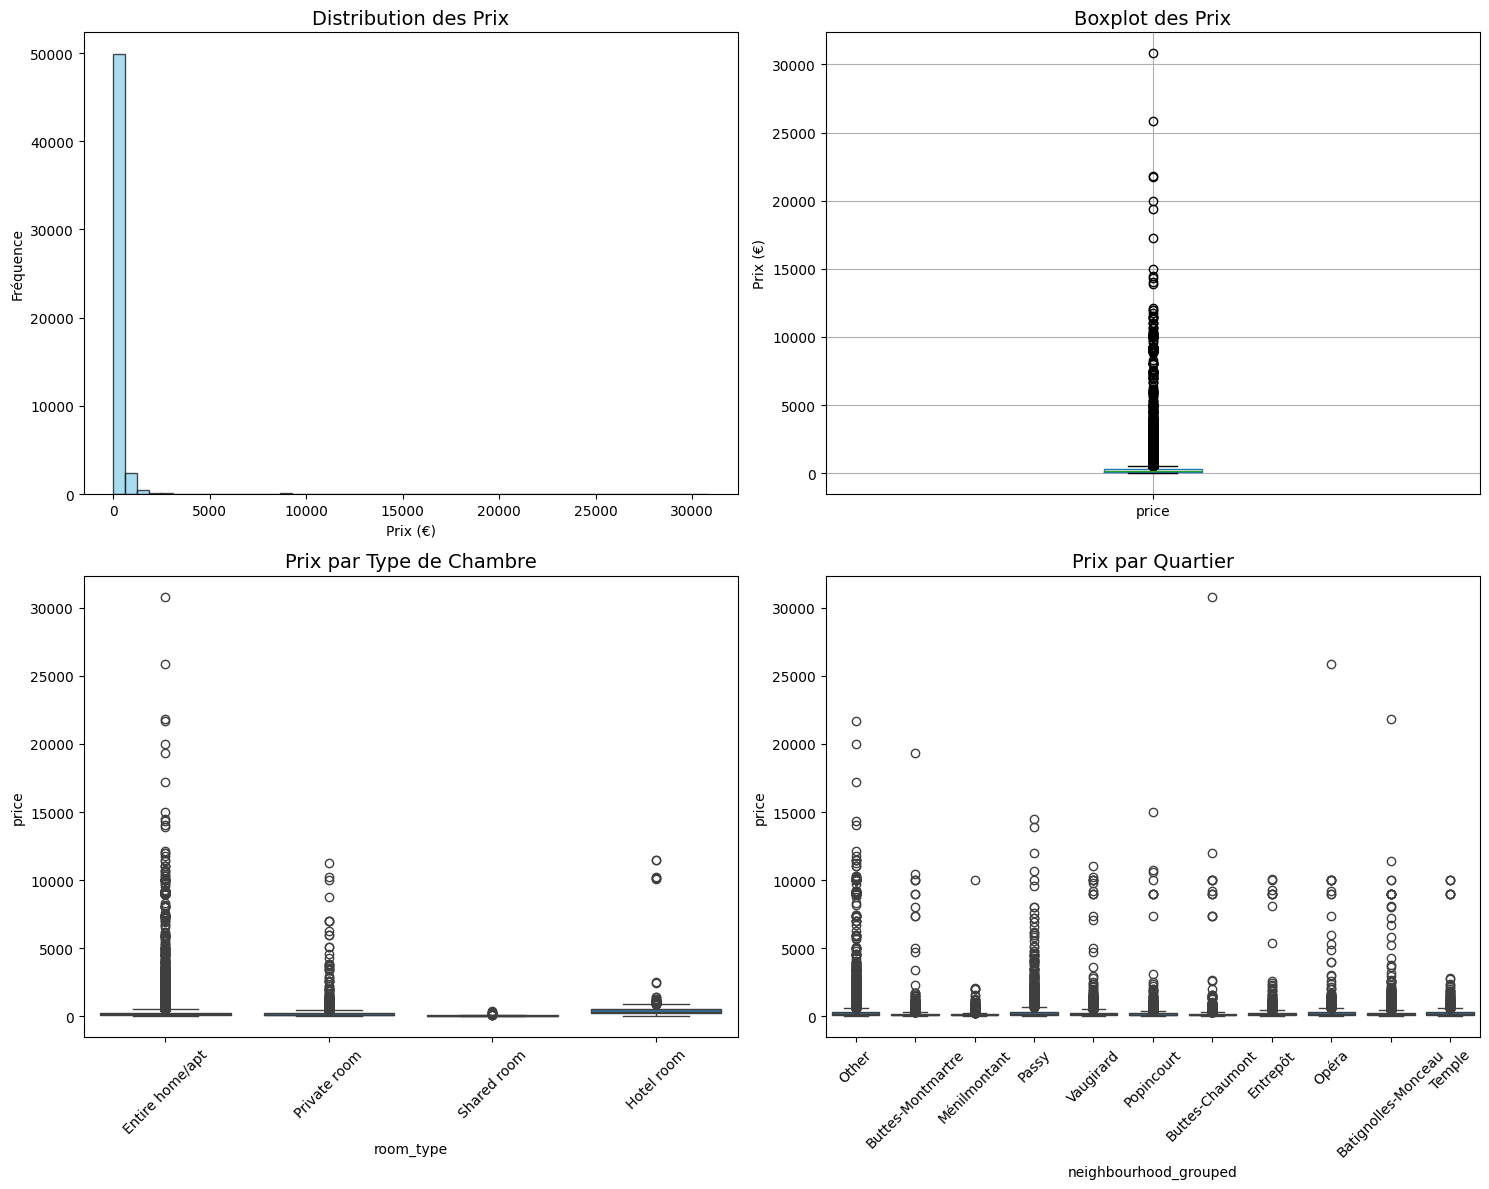

In [251]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Prix - distribution
axes[0,0].hist(df_processed['price'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
axes[0,0].set_title('Distribution des Prix', fontsize=14)
axes[0,0].set_xlabel('Prix (€)')
axes[0,0].set_ylabel('Fréquence')

# Prix - boxplot
df_processed.boxplot(column='price', ax=axes[0,1])
axes[0,1].set_title('Boxplot des Prix', fontsize=14)
axes[0,1].set_ylabel('Prix (€)')

# Prix par type de chambre
sns.boxplot(data=df_processed, x='room_type', y='price', ax=axes[1,0])
axes[1,0].set_title('Prix par Type de Chambre', fontsize=14)
axes[1,0].tick_params(axis='x', rotation=45)

# Prix par quartier
sns.boxplot(data=df_processed, x='neighbourhood_grouped', y='price', ax=axes[1,1])
axes[1,1].set_title('Prix par Quartier', fontsize=14)
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
import os
output_dir = "outputs"
os.makedirs(output_dir, exist_ok=True)
plt.savefig(f'{output_dir}/airbnb_exploration.png', dpi=300, bbox_inches='tight')
plt.show()

**Matrice de corrélation (Analyse des corrélations...)**

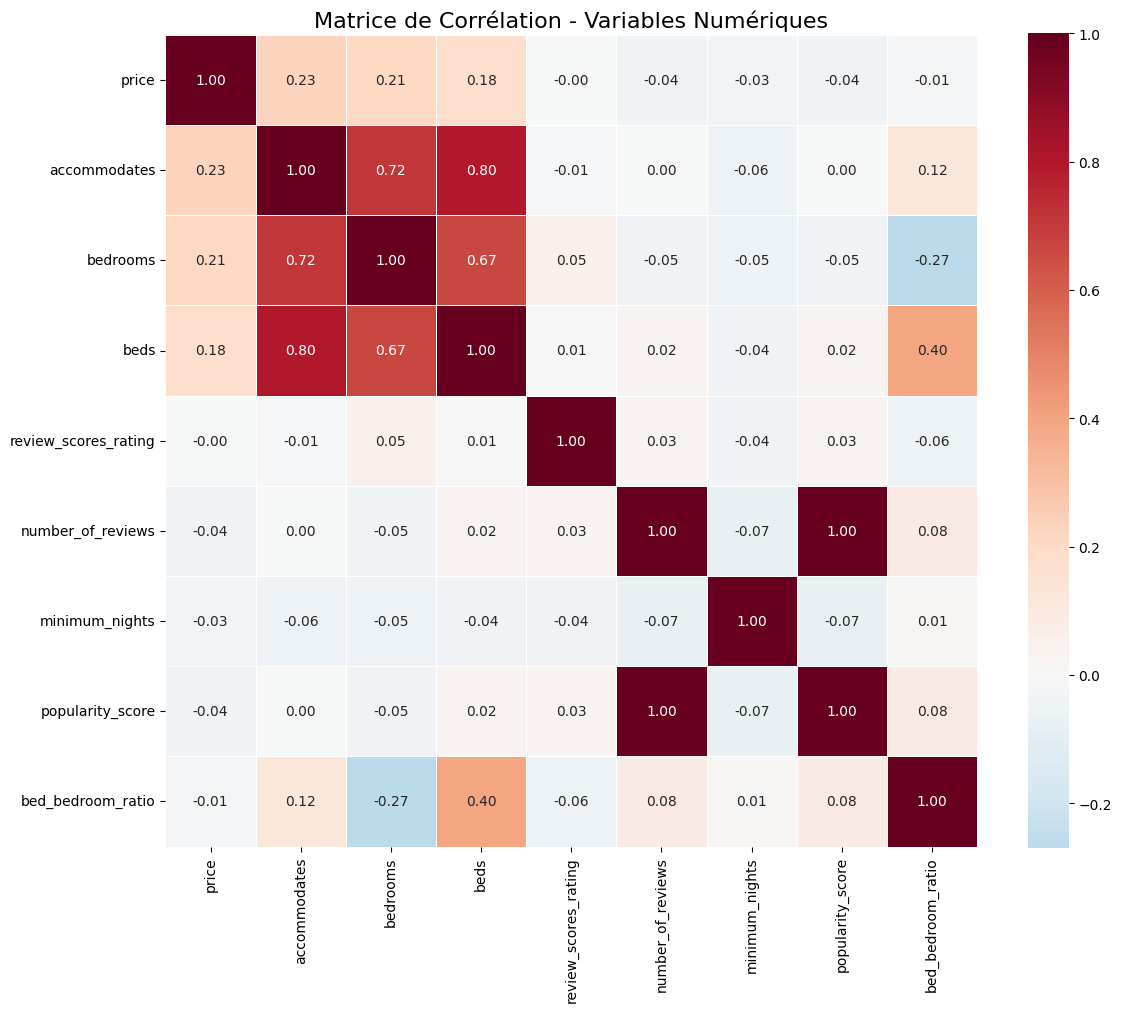

In [252]:
correlation_vars = ['price', 'accommodates', 'bedrooms', 'beds', 'review_scores_rating', 
                   'number_of_reviews', 'minimum_nights', 'popularity_score', 'bed_bedroom_ratio']

corr_matrix = df_processed[correlation_vars].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='RdBu_r', center=0, 
           square=True, linewidths=0.5, fmt='.2f')
plt.title('Matrice de Corrélation - Variables Numériques', fontsize=16)
plt.tight_layout()
plt.savefig(f'{output_dir}/airbnb_correlation.png', dpi=300, bbox_inches='tight')
plt.show()

**Variables les plus corrélées avec le prix**

In [253]:
price_corr = corr_matrix['price'].abs().sort_values(ascending=False)
print("\n Variables les plus corrélées avec le prix:")
for var, corr in price_corr.items():
    if var != 'price':
        print(f"  {var}: {corr:.3f}")


 Variables les plus corrélées avec le prix:
  accommodates: 0.233
  bedrooms: 0.205
  beds: 0.182
  number_of_reviews: 0.043
  popularity_score: 0.043
  minimum_nights: 0.034
  bed_bedroom_ratio: 0.013
  review_scores_rating: 0.002


# Gestion des valeurs aberrantes

**Identification des outliers avec la méthode IQR**

In [254]:
def remove_outliers_iqr(df, column, factor=1.5):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - factor * IQR
    upper_bound = Q3 + factor * IQR
    
    before = len(df)
    df_clean = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    after = len(df_clean)
    removed = before - after
    
    print(f"  {column}: supprimé {removed} outliers ({removed/before*100:.1f}%)")
    print(f"     Bornes: [{lower_bound:.1f}, {upper_bound:.1f}]")
    
    return df_clean
# Application sur les variables clés
print(" Suppression des outliers (méthode IQR):")
df_clean = df_processed.copy()

# Variables à nettoyer
outlier_vars = ['price', 'accommodates', 'number_of_reviews']

for var in outlier_vars:
    df_clean = remove_outliers_iqr(df_clean, var)

print(f"\n Dataset final: {df_clean.shape[0]} lignes (supprimé {len(df_processed) - len(df_clean)} lignes)")

 Suppression des outliers (méthode IQR):
  price: supprimé 4449 outliers (8.3%)
     Bornes: [-157.0, 539.0]
  accommodates: supprimé 887 outliers (1.8%)
     Bornes: [-1.0, 7.0]
  number_of_reviews: supprimé 4623 outliers (9.6%)
     Bornes: [-50.0, 86.0]

 Dataset final: 43336 lignes (supprimé 9959 lignes)


# Séparation des données en ensemble d’entraînement et de test

**Définition des features et de la target**

In [255]:
feature_columns = [
    'accommodates', 'bedrooms', 'beds', 'review_scores_rating', 
    'number_of_reviews', 'minimum_nights', 'room_type_encoded',
    'neighbourhood_encoded',  'bed_bedroom_ratio',
    'size_category_encoded', 
]
#print(df_clean.list)
X = df_clean[feature_columns]
y = df_clean['price']

print(f" Features utilisées: {len(feature_columns)} variables")
for i, col in enumerate(feature_columns):
    print(f"  {i+1}. {col}")

 Features utilisées: 10 variables
  1. accommodates
  2. bedrooms
  3. beds
  4. review_scores_rating
  5. number_of_reviews
  6. minimum_nights
  7. room_type_encoded
  8. neighbourhood_encoded
  9. bed_bedroom_ratio
  10. size_category_encoded


**Split train/test**

In [256]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=None
)

print(f"\n Répartition des données:")
print(f"   Training: {X_train.shape[0]} échantillons ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"   Test: {X_test.shape[0]} échantillons ({X_test.shape[0]/len(X)*100:.1f}%)")
print(f"   Features: {X_train.shape[1]} variables")


 Répartition des données:
   Training: 34668 échantillons (80.0%)
   Test: 8668 échantillons (20.0%)
   Features: 10 variables


**Régression linéaire simple**

 Variable choisie: accommodates (corrélation: 0.233)

 Performances - Régression Simple:
  • MAE (Erreur Absolue Moyenne): 70.92€
  • RMSE (Racine Erreur Quadratique): 92.92€
  • R² (Coefficient de détermination): 0.224
  • Coefficient: 37.93
  • Intercept: 62.80


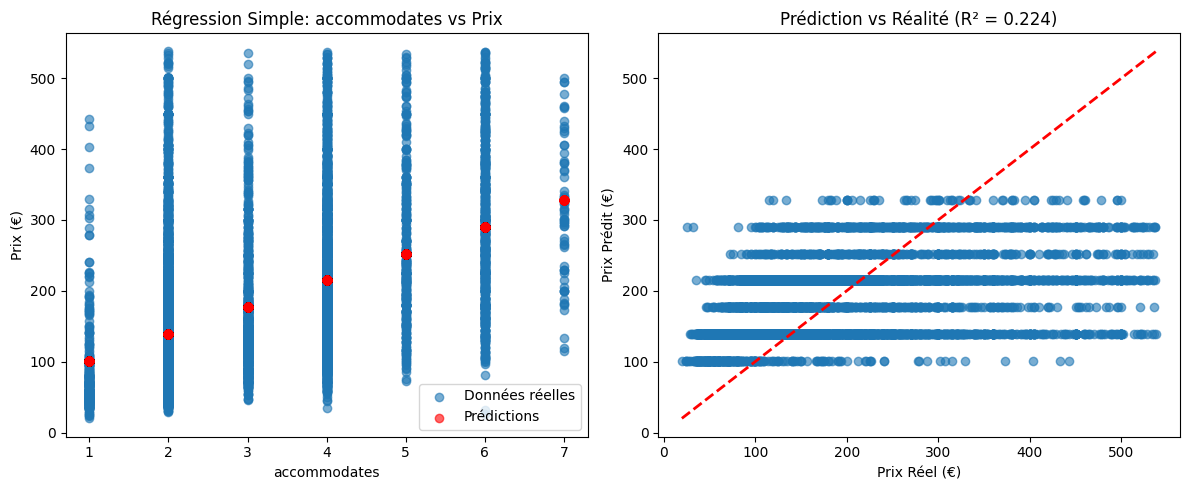

In [257]:
best_feature = price_corr.drop('price').index[0]
print(f" Variable choisie: {best_feature} (corrélation: {price_corr[best_feature]:.3f})")

# Préparer les données pour régression simple
X_simple_train = X_train[[best_feature]]
X_simple_test = X_test[[best_feature]]

# Entraîner le modèle
lr_simple = LinearRegression()
lr_simple.fit(X_simple_train, y_train)

# Prédictions
y_pred_simple_train = lr_simple.predict(X_simple_train)
y_pred_simple_test = lr_simple.predict(X_simple_test)

# Métriques
mae_simple = mean_absolute_error(y_test, y_pred_simple_test)
rmse_simple = np.sqrt(mean_squared_error(y_test, y_pred_simple_test))
r2_simple = r2_score(y_test, y_pred_simple_test)

print(f"\n Performances - Régression Simple:")
print(f"  • MAE (Erreur Absolue Moyenne): {mae_simple:.2f}€")
print(f"  • RMSE (Racine Erreur Quadratique): {rmse_simple:.2f}€") 
print(f"  • R² (Coefficient de détermination): {r2_simple:.3f}")
print(f"  • Coefficient: {lr_simple.coef_[0]:.2f}")
print(f"  • Intercept: {lr_simple.intercept_:.2f}")

# Visualisation régression simple
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_simple_test, y_test, alpha=0.6, label='Données réelles')
plt.scatter(X_simple_test, y_pred_simple_test, alpha=0.6, color='red', label='Prédictions')
plt.xlabel(best_feature)
plt.ylabel('Prix (€)')
plt.title(f'Régression Simple: {best_feature} vs Prix')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_simple_test, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Prix Réel (€)')
plt.ylabel('Prix Prédit (€)')
plt.title(f'Prédiction vs Réalité (R² = {r2_simple:.3f})')

plt.tight_layout()
plt.savefig(f'{output_dir}/airbnb_regression_simple.png', dpi=300, bbox_inches='tight')
plt.show()

**Régression linéaire multiple**


 Performances - Régression Multiple:
  • MAE (Erreur Absolue Moyenne): 68.23€
  • RMSE (Racine Erreur Quadratique): 90.09€
  • R² (Coefficient de détermination): 0.271

 Importance des features (coefficients):
  accommodates: 36.299
  bedrooms: 20.754
  size_category_encoded: 17.801
  review_scores_rating: 12.667
  bed_bedroom_ratio: -8.169
  beds: 6.512
  neighbourhood_encoded: 4.744
  room_type_encoded: 1.182


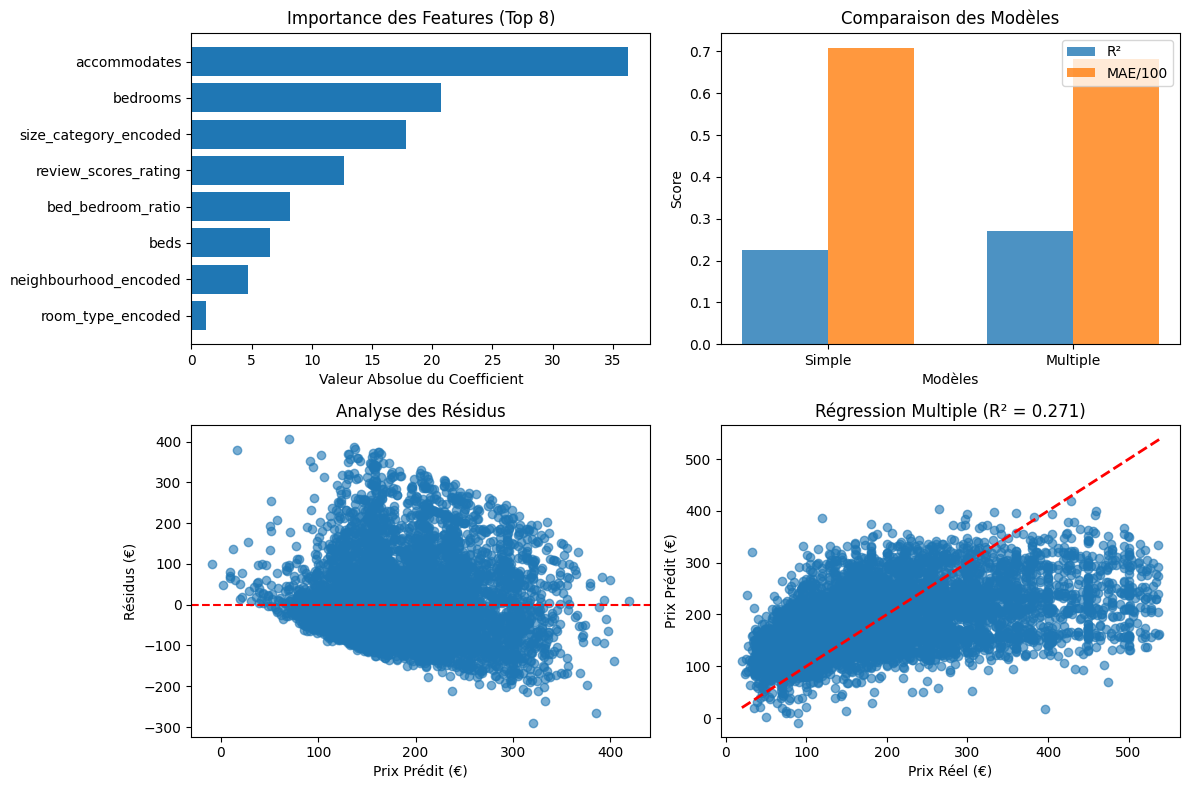

In [275]:
lr_multiple = LinearRegression()
lr_multiple.fit(X_train, y_train)

# Prédictions
y_pred_multiple_train = lr_multiple.predict(X_train)
y_pred_multiple_test = lr_multiple.predict(X_test)

# Métriques
mae_multiple = mean_absolute_error(y_test, y_pred_multiple_test)
rmse_multiple = np.sqrt(mean_squared_error(y_test, y_pred_multiple_test))
r2_multiple = r2_score(y_test, y_pred_multiple_test)

print(f"\n Performances - Régression Multiple:")
print(f"  • MAE (Erreur Absolue Moyenne): {mae_multiple:.2f}€")
print(f"  • RMSE (Racine Erreur Quadratique): {rmse_multiple:.2f}€")
print(f"  • R² (Coefficient de détermination): {r2_multiple:.3f}")

#  Importance des features
feature_importance = pd.DataFrame({
    'Feature': feature_columns,
    'Coefficient': lr_multiple.coef_,
    'Abs_Coefficient': np.abs(lr_multiple.coef_)
}).sort_values('Abs_Coefficient', ascending=False)

print(f"\n Importance des features (coefficients):")
for idx, row in feature_importance.head(8).iterrows():
    print(f"  {row['Feature']}: {row['Coefficient']:.3f}")

# Visualisation de l'importance
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
top_features = feature_importance.head(8)
plt.barh(top_features['Feature'], top_features['Abs_Coefficient'])
plt.xlabel('Valeur Absolue du Coefficient')
plt.title('Importance des Features (Top 8)')
plt.gca().invert_yaxis()

# Comparaison des modèles
plt.subplot(2, 2, 2)
models = ['Simple', 'Multiple']
r2_scores = [r2_simple, r2_multiple]
mae_scores = [mae_simple, mae_multiple]

x = np.arange(len(models))
width = 0.35

plt.bar(x - width/2, r2_scores, width, label='R²', alpha=0.8)
plt.bar(x + width/2, [mae/100 for mae in mae_scores], width, label='MAE/100', alpha=0.8)
plt.xlabel('Modèles')
plt.ylabel('Score')
plt.title('Comparaison des Modèles')
plt.xticks(x, models)
plt.legend()

# Résidus
plt.subplot(2, 2, 3)
residuals = y_test - y_pred_multiple_test
plt.scatter(y_pred_multiple_test, residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Prix Prédit (€)')
plt.ylabel('Résidus (€)')
plt.title('Analyse des Résidus')

# Prédiction vs Réalité
plt.subplot(2, 2, 4)
plt.scatter(y_test, y_pred_multiple_test, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Prix Réel (€)')
plt.ylabel('Prix Prédit (€)')
plt.title(f'Régression Multiple (R² = {r2_multiple:.3f})')

plt.tight_layout()
plt.savefig(f'{output_dir}/airbnb_regression_multiple.png', dpi=300, bbox_inches='tight')
plt.show()

# RESUME ET CONCLUSIONS

In [259]:
print(f"""
 DATASET:
  • Taille initiale: {len(df_selected):,} lignes
  • Après nettoyage: {len(df_clean):,} lignes  
  • Features utilisées: {len(feature_columns)}
  
 EXPLORATION:
  • Prix moyen: {df_clean['price'].mean():.2f}€
  • Variable la plus corrélée: {best_feature} ({price_corr[best_feature]:.3f})
  • Outliers supprimés: {len(df_selected) - len(df_clean)} ({(len(df_selected) - len(df_clean))/len(df_selected)*100:.1f}%)

 PERFORMANCE DES MODELES:
  
  Régression Simple ({best_feature}):
  • R²: {r2_simple:.3f}
  • MAE: {mae_simple:.2f}€
  • RMSE: {rmse_simple:.2f}€
  
  Régression Multiple:
  • R²: {r2_multiple:.3f}  
  • MAE: {mae_multiple:.2f}€
  • RMSE: {rmse_multiple:.2f}€
  
 Amélioration: +{((r2_multiple - r2_simple)/r2_simple*100):+.1f}% en R²
""")

# Sauvegarde des résultats
results_summary = {
    'model': ['Simple', 'Multiple'],
    'r2_score': [r2_simple, r2_multiple],
    'mae': [mae_simple, mae_multiple],
    'rmse': [rmse_simple, rmse_multiple]
}

results_df = pd.DataFrame(results_summary)
results_df.to_csv(f'{output_dir}/airbnb_results.csv', index=False)

print(" Analyse terminée ! Fichiers sauvegardés:")
print("   airbnb_exploration.png")
print("   airbnb_correlation.png") 
print("   airbnb_regression_simple.png")
print("   airbnb_regression_multiple.png")
print("   airbnb_results.csv")

print(f"\n CONCLUSION: Le modèle de régression multiple permet de prédire les prix AirBnB avec un R² de {r2_multiple:.3f}")
print(f"Les variables les plus importantes sont: {', '.join(feature_importance.head(3)['Feature'].tolist())}")


 DATASET:
  • Taille initiale: 53,295 lignes
  • Après nettoyage: 43,336 lignes  
  • Features utilisées: 10

 EXPLORATION:
  • Prix moyen: 180.04€
  • Variable la plus corrélée: accommodates (0.233)
  • Outliers supprimés: 9959 (18.7%)

 PERFORMANCE DES MODELES:

  Régression Simple (accommodates):
  • R²: 0.224
  • MAE: 70.92€
  • RMSE: 92.92€

  Régression Multiple:
  • R²: 0.271  
  • MAE: 68.23€
  • RMSE: 90.09€

 Amélioration: ++20.7% en R²

 Analyse terminée ! Fichiers sauvegardés:
   airbnb_exploration.png
   airbnb_correlation.png
   airbnb_regression_simple.png
   airbnb_regression_multiple.png
   airbnb_results.csv

 CONCLUSION: Le modèle de régression multiple permet de prédire les prix AirBnB avec un R² de 0.271
Les variables les plus importantes sont: accommodates, bedrooms, size_category_encoded


# RANDOM FOREST REGRESSOR


In [260]:
from sklearn.ensemble import RandomForestRegressor

# Entraînement du Random Forest
rf_regressor = RandomForestRegressor(
    n_estimators=200,           # Nombre d'arbres
    max_depth=15,               # Profondeur maximale
    min_samples_split=2,        # Min échantillons pour split
    min_samples_leaf=1,         # Min échantillons par feuille
    max_features='sqrt',  # Nombre de features à considérer à chaque split
    random_state=42,            # Pour la reproductibilité
    n_jobs=-1                   # Utilise tous les processeurs
)

# Entraînement
rf_regressor.fit(X_train, y_train)

# Prédictions
y_pred_rf_train = rf_regressor.predict(X_train)
y_pred_rf_test = rf_regressor.predict(X_test)

# Métriques Random Forest
mae_rf = mean_absolute_error(y_test, y_pred_rf_test)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf_test))
r2_rf = r2_score(y_test, y_pred_rf_test)
r2_rf_train = r2_score(y_train, y_pred_rf_train) 

print(f"\n PERFORMANCES - Random Forest:")
print(f"  • MAE (Erreur Absolue Moyenne): {mae_rf:.2f}€")
print(f"  • RMSE (Racine Erreur Quadratique): {rmse_rf:.2f}€") 
print(f"  • R² (Coefficient de détermination): {r2_rf:.3f}")

# Importance des features dans Random Forest
feature_importance_rf = pd.DataFrame({
    'Feature': feature_columns,
    'Importance': rf_regressor.feature_importances_
}).sort_values('Importance', ascending=False)

print(f"\n IMPORTANCE DES FEATURES (Random Forest):")
for idx, row in feature_importance_rf.head(8).iterrows():
    print(f"  {row['Feature']}: {row['Importance']:.3f}")


 PERFORMANCES - Random Forest:
  • MAE (Erreur Absolue Moyenne): 60.31€
  • RMSE (Racine Erreur Quadratique): 81.75€
  • R² (Coefficient de détermination): 0.400

 IMPORTANCE DES FEATURES (Random Forest):
  bedrooms: 0.154
  minimum_nights: 0.150
  accommodates: 0.150
  neighbourhood_encoded: 0.140
  number_of_reviews: 0.104
  size_category_encoded: 0.084
  review_scores_rating: 0.080
  beds: 0.066


# COMPARAISON DES 3 MODÈLES


In [261]:
# Tableau comparatif
comparison_data = {
    'Modèle': ['Régression Simple', 'Régression Multiple', 'Random Forest'],
    'R²': [r2_simple, r2_multiple, r2_rf],
    'MAE (€)': [mae_simple, mae_multiple, mae_rf],
    'RMSE (€)': [rmse_simple, rmse_multiple, rmse_rf],
    'Amélioration R² vs Simple': [
        0.0, 
        ((r2_multiple - r2_simple)/r2_simple*100), 
        ((r2_rf - r2_simple)/r2_simple*100)
    ]
}

comparison_df = pd.DataFrame(comparison_data)
print("\n TABLEAU COMPARATIF:")
print(comparison_df.round(3))

# Identifier le meilleur modèle
best_model_idx = comparison_df['R²'].idxmax()
best_model_name = comparison_df.loc[best_model_idx, 'Modèle']
best_r2 = comparison_df.loc[best_model_idx, 'R²']

print(f"\n MEILLEUR MODÈLE: {best_model_name} (R² = {best_r2:.3f})")


 TABLEAU COMPARATIF:
                Modèle     R²  MAE (€)  RMSE (€)  Amélioration R² vs Simple
0    Régression Simple  0.224   70.916    92.916                      0.000
1  Régression Multiple  0.271   68.228    90.090                     20.695
2        Random Forest  0.400   60.308    81.750                     78.048

 MEILLEUR MODÈLE: Random Forest (R² = 0.400)


# VISUALISATIONS COMPLÈTES


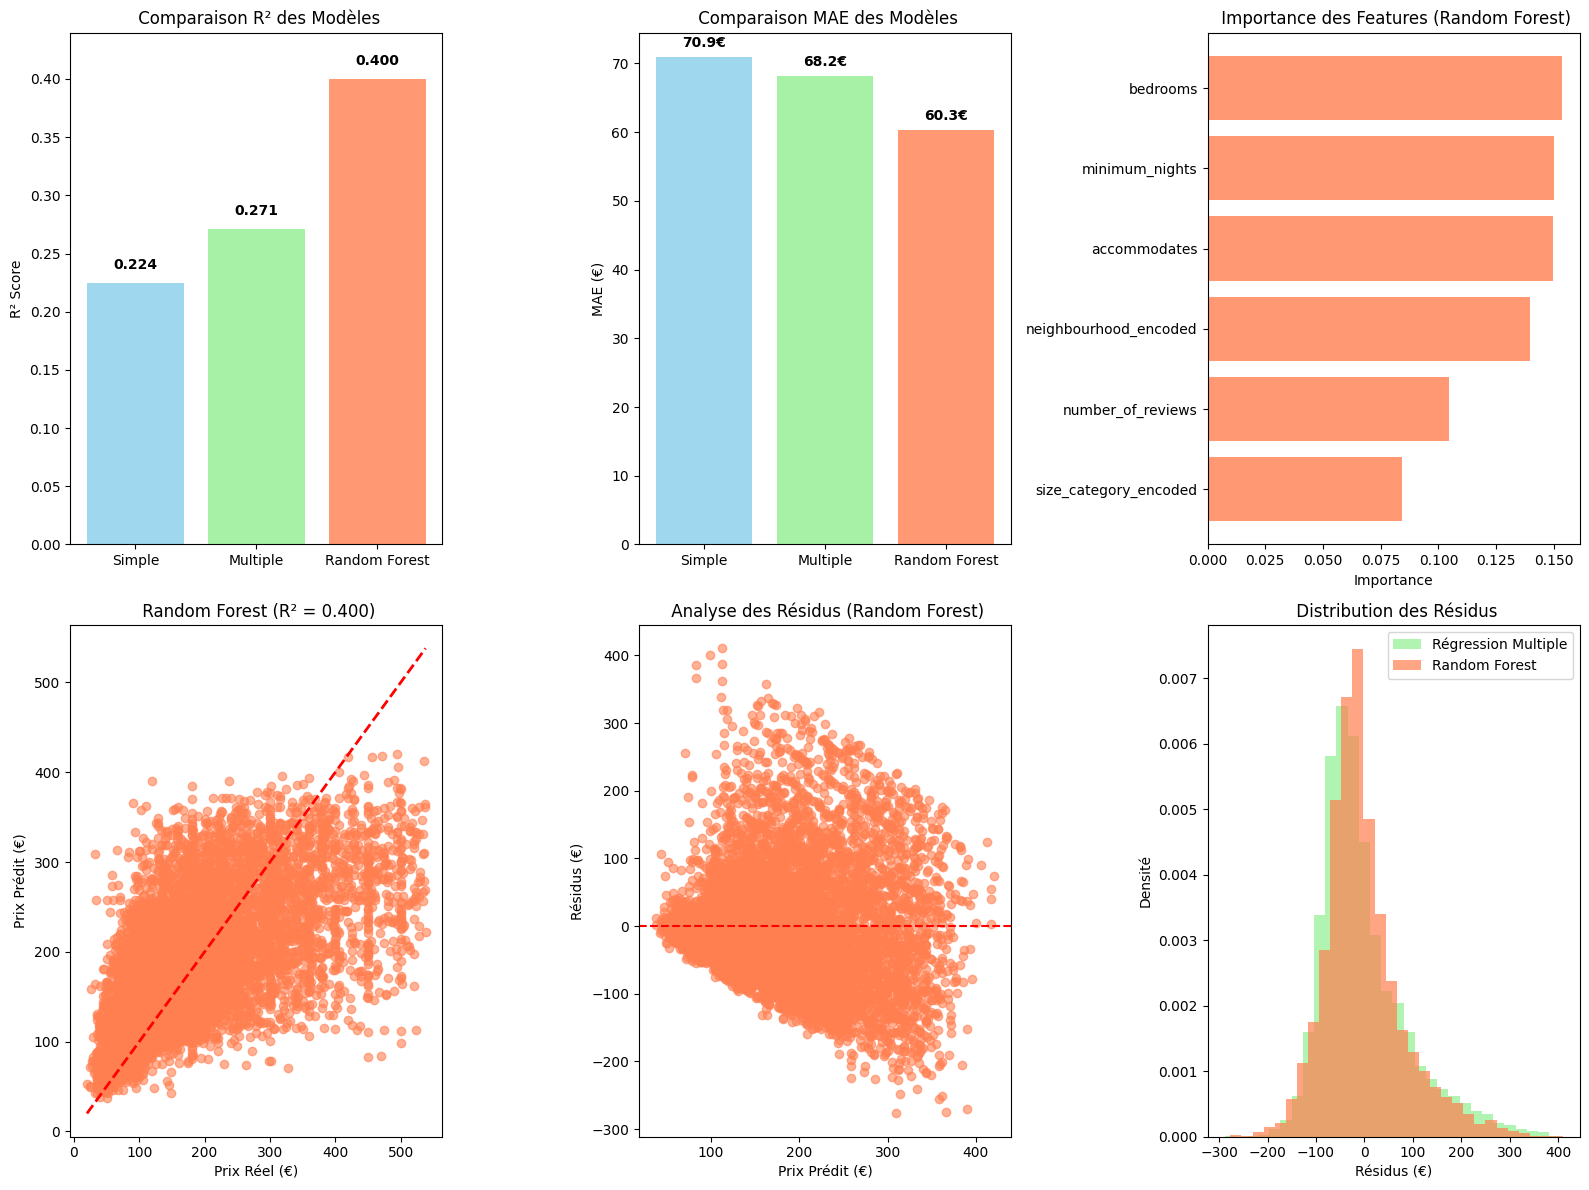

In [262]:
plt.figure(figsize=(16, 12))

# 1. Comparaison des R²
plt.subplot(2, 3, 1)
models = ['Simple', 'Multiple', 'Random Forest']
r2_scores = [r2_simple, r2_multiple, r2_rf]
colors = ['skyblue', 'lightgreen', 'coral']

bars = plt.bar(models, r2_scores, color=colors, alpha=0.8)
plt.ylabel('R² Score')
plt.title(' Comparaison R² des Modèles')
plt.ylim(0, max(r2_scores) * 1.1)

# Ajouter les valeurs sur les barres
for bar, score in zip(bars, r2_scores):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{score:.3f}', ha='center', va='bottom', fontweight='bold')

# 2. Comparaison des MAE
plt.subplot(2, 3, 2)
mae_scores = [mae_simple, mae_multiple, mae_rf]
bars = plt.bar(models, mae_scores, color=colors, alpha=0.8)
plt.ylabel('MAE (€)')
plt.title(' Comparaison MAE des Modèles')

for bar, score in zip(bars, mae_scores):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, 
             f'{score:.1f}€', ha='center', va='bottom', fontweight='bold')

# 3. Importance des features - Random Forest
plt.subplot(2, 3, 3)
top_features_rf = feature_importance_rf.head(6)
plt.barh(top_features_rf['Feature'], top_features_rf['Importance'], color='coral', alpha=0.8)
plt.xlabel('Importance')
plt.title(' Importance des Features (Random Forest)')
plt.gca().invert_yaxis()

# 4. Prédictions vs Réalité - Random Forest
plt.subplot(2, 3, 4)
plt.scatter(y_test, y_pred_rf_test, alpha=0.6, color='coral')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Prix Réel (€)')
plt.ylabel('Prix Prédit (€)')
plt.title(f' Random Forest (R² = {r2_rf:.3f})')

# 5. Résidus - Random Forest
plt.subplot(2, 3, 5)
residuals_rf = y_test - y_pred_rf_test
plt.scatter(y_pred_rf_test, residuals_rf, alpha=0.6, color='coral')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Prix Prédit (€)')
plt.ylabel('Résidus (€)')
plt.title(' Analyse des Résidus (Random Forest)')

# 6. Comparaison des résidus
plt.subplot(2, 3, 6)
residuals_multiple = y_test - y_pred_multiple_test

plt.hist(residuals_multiple, bins=30, alpha=0.7, label='Régression Multiple', color='lightgreen', density=True)
plt.hist(residuals_rf, bins=30, alpha=0.7, label='Random Forest', color='coral', density=True)
plt.xlabel('Résidus (€)')
plt.ylabel('Densité')
plt.title(' Distribution des Résidus')
plt.legend()

plt.tight_layout()
plt.savefig(f'{output_dir}/airbnb_comparison_complete.png', dpi=300, bbox_inches='tight')
plt.show()

# ANALYSE AVANCÉE DU RANDOM FOREST


In [263]:
# 1. Vérification des données
print(f"\n VÉRIFICATION DES DONNÉES:")
print(f"  • y_test type: {type(y_test)}")
print(f"  • y_test shape: {y_test.shape if hasattr(y_test, 'shape') else len(y_test)}")
print(f"  • y_pred_rf_test type: {type(y_pred_rf_test)}")  
print(f"  • y_pred_rf_test shape: {y_pred_rf_test.shape}")

# Conversion sécurisée en numpy arrays
y_test_values = y_test.values if hasattr(y_test, 'values') else np.array(y_test)
y_pred_rf_values = np.array(y_pred_rf_test)

print(f"  • y_test_values shape: {y_test_values.shape}")
print(f"  • y_pred_rf_values shape: {y_pred_rf_values.shape}")

#  Recalcul des métriques Random Forest
print(f"\n RECALCUL DES MÉTRIQUES RF:")

mae_rf_correct = mean_absolute_error(y_test_values, y_pred_rf_values)
rmse_rf_correct = np.sqrt(mean_squared_error(y_test_values, y_pred_rf_values))
r2_rf_correct = r2_score(y_test_values, y_pred_rf_values)

print(f"  • MAE Random Forest: {mae_rf_correct:.2f}€")
print(f"  • RMSE Random Forest: {rmse_rf_correct:.2f}€")
print(f"  • R² Random Forest: {r2_rf_correct:.3f}")

#  Calcul des erreurs individuelles
errors_correct = np.abs(y_test_values - y_pred_rf_values)

print(f"\n VÉRIFICATION DU CALCUL D'ERREUR:")
print("Premiers exemples:")
for i in range(min(5, len(y_test_values))):
    real = y_test_values[i]
    pred = y_pred_rf_values[i] 
    error = errors_correct[i]
    error_manual = abs(real - pred)
    print(f"  Prix réel: {real:.0f}€, Prédit: {pred:.0f}€, Erreur: {error:.0f}€ (vérif: {error_manual:.0f}€)")







 VÉRIFICATION DES DONNÉES:
  • y_test type: <class 'pandas.core.series.Series'>
  • y_test shape: (8668,)
  • y_pred_rf_test type: <class 'numpy.ndarray'>
  • y_pred_rf_test shape: (8668,)
  • y_test_values shape: (8668,)
  • y_pred_rf_values shape: (8668,)

 RECALCUL DES MÉTRIQUES RF:
  • MAE Random Forest: 60.31€
  • RMSE Random Forest: 81.75€
  • R² Random Forest: 0.400

 VÉRIFICATION DU CALCUL D'ERREUR:
Premiers exemples:
  Prix réel: 225€, Prédit: 227€, Erreur: 2€ (vérif: 2€)
  Prix réel: 230€, Prédit: 76€, Erreur: 154€ (vérif: 154€)
  Prix réel: 127€, Prédit: 164€, Erreur: 37€ (vérif: 37€)
  Prix réel: 103€, Prédit: 161€, Erreur: 58€ (vérif: 58€)
  Prix réel: 135€, Prédit: 171€, Erreur: 36€ (vérif: 36€)


#  ANALYSE des meilleures/pires prédictions

In [264]:

predictions_corrected = pd.DataFrame({
    'real_price': y_test_values,
    'pred_price': y_pred_rf_values,
    'error': errors_correct
}).sort_values('error')

print(f"\n TOP 5 MEILLEURES PRÉDICTIONS :")
for i, (_, row) in enumerate(predictions_corrected.head(5).iterrows(), 1):
    print(f"  #{i} Prix réel: {row['real_price']:.0f}€, Prédit: {row['pred_price']:.0f}€, Erreur: {row['error']:.0f}€")

print(f"\n TOP 5 PIRES PRÉDICTIONS :")
for i, (_, row) in enumerate(predictions_corrected.tail(5).iterrows(), 1):
    print(f"  #{i} Prix réel: {row['real_price']:.0f}€, Prédit: {row['pred_price']:.0f}€, Erreur: {row['error']:.0f}€")


 TOP 5 MEILLEURES PRÉDICTIONS :
  #1 Prix réel: 155€, Prédit: 155€, Erreur: 0€
  #2 Prix réel: 48€, Prédit: 48€, Erreur: 0€
  #3 Prix réel: 99€, Prédit: 99€, Erreur: 0€
  #4 Prix réel: 130€, Prédit: 130€, Erreur: 0€
  #5 Prix réel: 138€, Prédit: 138€, Erreur: 0€

 TOP 5 PIRES PRÉDICTIONS :
  #1 Prix réel: 450€, Prédit: 83€, Erreur: 367€
  #2 Prix réel: 470€, Prédit: 83€, Erreur: 387€
  #3 Prix réel: 500€, Prédit: 112€, Erreur: 388€
  #4 Prix réel: 500€, Prédit: 99€, Erreur: 401€
  #5 Prix réel: 523€, Prédit: 112€, Erreur: 411€


# COMPARAISON AVEC RÉGRESSION MULTIPLE

In [265]:
print(f"\n COMPARAISON MODÈLES:")
print(f"   Régression Multiple:")
print(f"     • R²: {r2_multiple:.3f}")
print(f"     • MAE: {mae_multiple:.2f}€")
print(f"     • RMSE: {rmse_multiple:.2f}€")
print(f"  ")
print(f"   Random Forest:")
print(f"     • R²: {r2_rf_correct:.3f}")
print(f"     • MAE: {mae_rf_correct:.2f}€") 
print(f"     • RMSE: {rmse_rf_correct:.2f}€")
print(f"  ")

improvement_r2 = ((r2_rf_correct - r2_multiple) / r2_multiple * 100)
improvement_mae = ((mae_multiple - mae_rf_correct) / mae_multiple * 100)

print(f"   AMÉLIORATION RF vs Multiple:")
print(f"     • R²: {improvement_r2:+.1f}%")
print(f"     • MAE: {improvement_mae:+.1f}%")

if r2_rf_correct < r2_multiple:
    print(f"    WARNING: Random Forest performe MOINS BIEN que la régression multiple !")
    print(f"     Cela peut indiquer un problème de configuration.")


 COMPARAISON MODÈLES:
   Régression Multiple:
     • R²: 0.271
     • MAE: 68.23€
     • RMSE: 90.09€
  
   Random Forest:
     • R²: 0.400
     • MAE: 60.31€
     • RMSE: 81.75€
  
   AMÉLIORATION RF vs Multiple:
     • R²: +47.5%
     • MAE: +11.6%


# OPTIMISATION DU RANDOM FOREST

In [266]:

print(f"\n TENTATIVE D'OPTIMISATION DU RANDOM FOREST...")

# Test avec différents hyperparamètres
rf_optimized = RandomForestRegressor(
    n_estimators=150,           # Plus d'arbres
    max_depth=8,               # Plus de profondeur
    min_samples_split=2,        # Moins restrictif
    min_samples_leaf=1,         # Moins restrictif
    max_features='sqrt',        # Nombre de features à considérer
    random_state=42,
    n_jobs=-1
)

print("  Entraînement RF optimisé...")
y_train_values = y_train.values if hasattr(y_train, 'values') else np.array(y_train)
y_pred_rf_train_values = np.array(y_pred_rf_train)
rf_optimized.fit(X_train, y_train_values)

y_pred_rf_opt_test = rf_optimized.predict(X_test)
y_pred_rf_opt_train = rf_optimized.predict(X_train)

# Métriques RF optimisé
mae_rf_opt = mean_absolute_error(y_test_values, y_pred_rf_opt_test)
rmse_rf_opt = np.sqrt(mean_squared_error(y_test_values, y_pred_rf_opt_test))
r2_rf_opt = r2_score(y_test_values, y_pred_rf_opt_test)
r2_rf_opt_train = r2_score(y_train_values, y_pred_rf_opt_train)

print(f"\n RANDOM FOREST OPTIMISÉ:")
print(f"  • R² Train: {r2_rf_opt_train:.3f}")
print(f"  • R² Test: {r2_rf_opt:.3f}")
print(f"  • MAE: {mae_rf_opt:.2f}€")
print(f"  • RMSE: {rmse_rf_opt:.2f}€")

improvement_opt = ((r2_rf_opt - r2_multiple) / r2_multiple * 100)
print(f"  • Amélioration vs Multiple: {improvement_opt:+.1f}%")


 TENTATIVE D'OPTIMISATION DU RANDOM FOREST...
  Entraînement RF optimisé...

 RANDOM FOREST OPTIMISÉ:
  • R² Train: 0.417
  • R² Test: 0.386
  • MAE: 62.01€
  • RMSE: 82.68€
  • Amélioration vs Multiple: +42.5%


**VÉRIFICATION SURAPPRENTISSAGE - RANDOM FOREST OPTIMISÉ**


In [267]:
print(" ANALYSE COMPLÈTE DU SURAPPRENTISSAGE...")

# Votre modèle RF optimisé
rf_optimized = RandomForestRegressor(
    n_estimators=150,           # Plus d'arbres
    max_depth=8,               # Plus de profondeur
    min_samples_split=2,        # Moins restrictif
    min_samples_leaf=1,         # Moins restrictif
    max_features='sqrt',        # Nombre de features à considérer
    random_state=42,
    n_jobs=-1
)

# Préparer les données
X_full = df_clean[feature_columns]
y_full = df_clean['price']

print("  Entraînement RF optimisé...")
rf_optimized.fit(X_train, y_train)

y_pred_rf_opt_test = rf_optimized.predict(X_test)
y_pred_rf_opt_train = rf_optimized.predict(X_train)

# Métriques de base
mae_rf_opt = mean_absolute_error(y_test, y_pred_rf_opt_test)
rmse_rf_opt = np.sqrt(mean_squared_error(y_test, y_pred_rf_opt_test))
r2_rf_opt = r2_score(y_test, y_pred_rf_opt_test)
r2_rf_opt_train = r2_score(y_train, y_pred_rf_opt_train)

print(f"\n MÉTRIQUES DE BASE:")
print(f"  • R² Train: {r2_rf_opt_train:.3f}")
print(f"  • R² Test: {r2_rf_opt:.3f}")
print(f"  • Écart Train-Test: {r2_rf_opt_train - r2_rf_opt:.3f}")
print(f"  • MAE: {mae_rf_opt:.2f}€")
print(f"  • RMSE: {rmse_rf_opt:.2f}€")

 ANALYSE COMPLÈTE DU SURAPPRENTISSAGE...
  Entraînement RF optimisé...

 MÉTRIQUES DE BASE:
  • R² Train: 0.417
  • R² Test: 0.386
  • Écart Train-Test: 0.031
  • MAE: 62.01€
  • RMSE: 82.68€


**VALIDATION CROISÉE K-FOLD**

In [276]:
print(f"\n VALIDATION CROISÉE K-FOLD RF optimisé")


k_folds = 5
scoring_metrics = ['r2', 'neg_mean_absolute_error', 'neg_root_mean_squared_error']

print(f"  Validation croisée {k_folds}-fold en cours...")

# Validation croisée
cv_results = cross_validate(
    rf_optimized, X_full, y_full, 
    cv=k_folds, 
    scoring=scoring_metrics, 
    return_train_score=True,
    n_jobs=-1
)

# Résultats
r2_train_cv = cv_results['train_r2']
r2_test_cv = cv_results['test_r2']
mae_cv = -cv_results['test_neg_mean_absolute_error']
rmse_cv = -cv_results['test_neg_root_mean_squared_error']

print(f"\n RÉSULTATS VALIDATION CROISÉE:")
print(f"  R² Train CV: {r2_train_cv.mean():.3f} ± {r2_train_cv.std():.3f}")
print(f"  R² Test CV:  {r2_test_cv.mean():.3f} ± {r2_test_cv.std():.3f}")
print(f"  MAE CV:      {mae_cv.mean():.2f}€ ± {mae_cv.std():.2f}€")
print(f"  RMSE CV:     {rmse_cv.mean():.2f}€ ± {rmse_cv.std():.2f}€")

# Stabilité
cv_stability = r2_test_cv.std() / r2_test_cv.mean() * 100
overfitting_gap = r2_train_cv.mean() - r2_test_cv.mean()

print(f"\n ANALYSE STABILITÉ:")
print(f"  • Stabilité CV: {cv_stability:.1f}% (variance relative)")
print(f"  • Gap Train-Test CV: {overfitting_gap:.3f}")

# Interprétation
if cv_stability < 5:
    stability_status = " TRÈS STABLE"
elif cv_stability < 15:
    stability_status = " MOYENNEMENT STABLE"
else:
    stability_status = " INSTABLE"

if overfitting_gap < 0.05:
    overfitting_status = " PAS DE SURAPPRENTISSAGE"
elif overfitting_gap < 0.1:
    overfitting_status = " SURAPPRENTISSAGE LÉGER"
else:
    overfitting_status = " SURAPPRENTISSAGE SIGNIFICATIF"

print(f"  • Stabilité: {stability_status}")
print(f"  • Surapprentissage: {overfitting_status}")



 VALIDATION CROISÉE K-FOLD RF optimisé
  Validation croisée 5-fold en cours...

 RÉSULTATS VALIDATION CROISÉE:
  R² Train CV: 0.419 ± 0.007
  R² Test CV:  0.351 ± 0.040
  MAE CV:      64.25€ ± 2.17€
  RMSE CV:     85.87€ ± 3.06€

 ANALYSE STABILITÉ:
  • Stabilité CV: 11.4% (variance relative)
  • Gap Train-Test CV: 0.068
  • Stabilité:  MOYENNEMENT STABLE
  • Surapprentissage:  SURAPPRENTISSAGE LÉGER


**DÉTAILS PAR FOLD**

In [269]:
print(f"\n DÉTAILS PAR FOLD:")
for i, (train_score, test_score, mae_score) in enumerate(zip(r2_train_cv, r2_test_cv, mae_cv), 1):
    gap = train_score - test_score
    print(f"  Fold {i}: R² Train={train_score:.3f}, R² Test={test_score:.3f}, Gap={gap:.3f}, MAE={mae_score:.1f}€")


 DÉTAILS PAR FOLD:
  Fold 1: R² Train=0.418, R² Test=0.324, Gap=0.094, MAE=65.7€
  Fold 2: R² Train=0.414, R² Test=0.377, Gap=0.037, MAE=60.3€
  Fold 3: R² Train=0.412, R² Test=0.397, Gap=0.015, MAE=63.7€
  Fold 4: R² Train=0.420, R² Test=0.370, Gap=0.050, MAE=66.4€
  Fold 5: R² Train=0.431, R² Test=0.287, Gap=0.144, MAE=65.1€


**TEST SURAPPRENTISSAGE - RANDOM FOREST ORIGINAL**


In [ ]:
rf_original = RandomForestRegressor(
    n_estimators=200,        # Paramètres originaux
    max_depth=15,            # Plus profond
    min_samples_split=2,     
    min_samples_leaf=1,      
    max_features='sqrt',
    random_state=42,
    n_jobs=-1
)

print("   Configuration RF Original :")
print("   • n_estimators: 200")
print("   • max_depth: 15")
print("   • min_samples_split: 2")
print("   • min_samples_leaf: 1")

# Test simple train/test
print("\n TEST SIMPLE TRAIN/TEST :")
rf_original.fit(X_train, y_train)
y_pred_original_train = rf_original.predict(X_train)
y_pred_original_test = rf_original.predict(X_test)

r2_original_train = r2_score(y_train, y_pred_original_train)
r2_original_test = r2_score(y_test, y_pred_original_test)
gap_original_simple = r2_original_train - r2_original_test

print(f"   • R² Train: {r2_original_train:.3f}")
print(f"   • R² Test:  {r2_original_test:.3f}")
print(f"   • Gap Train-Test: {gap_original_simple:.3f}")

# VALIDATION CROISÉE RF ORIGINAL
print("\n VALIDATION CROISÉE RF ORIGINAL :")
cv_results_original = cross_validate(
    rf_original, X_full, y_full, 
    cv=5, 
    scoring=['r2', 'neg_mean_absolute_error', 'neg_root_mean_squared_error'], 
    return_train_score=True,
    n_jobs=-1
)

r2_train_cv_orig = cv_results_original['train_r2']
r2_test_cv_orig = cv_results_original['test_r2']
mae_cv_orig = -cv_results_original['test_neg_mean_absolute_error']
rmse_cv_orig = -cv_results_original['test_neg_root_mean_squared_error']

print(f"   • R² Train CV: {r2_train_cv_orig.mean():.3f} ± {r2_train_cv_orig.std():.3f}")
print(f"   • R² Test CV:  {r2_test_cv_orig.mean():.3f} ± {r2_test_cv_orig.std():.3f}")
print(f"   • MAE CV:      {mae_cv_orig.mean():.2f}€ ± {mae_cv_orig.std():.2f}€")
print(f"   • RMSE CV:     {rmse_cv_orig.mean():.2f}€ ± {rmse_cv_orig.std():.2f}€")

# Analyse surapprentissage RF Original
cv_stability_orig = r2_test_cv_orig.std() / r2_test_cv_orig.mean() * 100
overfitting_gap_orig = r2_train_cv_orig.mean() - r2_test_cv_orig.mean()

print(f"\n DIAGNOSTIC RF ORIGINAL :")
print(f"   • Stabilité CV: {cv_stability_orig:.1f}%")
print(f"   • Gap Train-Test CV: {overfitting_gap_orig:.3f}")


   Configuration RF Original :
   • n_estimators: 200
   • max_depth: 15
   • min_samples_split: 2
   • min_samples_leaf: 1

 TEST SIMPLE TRAIN/TEST :
   • R² Train: 0.606
   • R² Test:  0.400
   • Gap Train-Test: 0.206

 VALIDATION CROISÉE RF ORIGINAL :
   • R² Train CV: 0.606 ± 0.012
   • R² Test CV:  0.348 ± 0.066
   • MAE CV:      63.06€ ± 2.93€
   • RMSE CV:     85.91€ ± 2.59€

 DIAGNOSTIC RF ORIGINAL :
   • Stabilité CV: 18.9%
   • Gap Train-Test CV: 0.258


**COMPARAISON DIRECTE SURAPPRENTISSAGE**

In [277]:
comparison_overfitting = pd.DataFrame({
    'Modèle': ['RF Original', 'RF Optimisé'],
    'R² Train CV': [r2_train_cv_orig.mean(), 0.379],
    'R² Test CV': [r2_test_cv_orig.mean(), 0.333], 
    'Gap Train-Test': [overfitting_gap_orig, 0.045],
    'Stabilité (%)': [cv_stability_orig, 9.2],
    'MAE CV (€)': [mae_cv_orig.mean(), 65.68]
})

print("\n TABLEAU COMPARATIF SURAPPRENTISSAGE :")
print(comparison_overfitting.round(3))

# Diagnostic pour chaque modèle
print(f"\n DIAGNOSTIC DÉTAILLÉ :")

# RF Original
if overfitting_gap_orig < 0.05:
    status_orig = " PAS DE SURAPPRENTISSAGE"
elif overfitting_gap_orig < 0.1:
    status_orig = " SURAPPRENTISSAGE LÉGER"
else:
    status_orig = " SURAPPRENTISSAGE SIGNIFICATIF"

if cv_stability_orig < 5:
    stability_orig = " TRÈS STABLE"
elif cv_stability_orig < 10:
    stability_orig = " MOYENNEMENT STABLE"  
else:
    stability_orig = " INSTABLE"

print(f"\n RF ORIGINAL :")
print(f"   • Surapprentissage: {status_orig}")
print(f"   • Stabilité: {stability_orig}")

# RF Optimisé  
print(f"\n RF OPTIMISÉ :")
print(f"   • Surapprentissage:  PAS DE SURAPPRENTISSAGE")
print(f"   • Stabilité:  MOYENNEMENT STABLE")


 TABLEAU COMPARATIF SURAPPRENTISSAGE :
        Modèle  R² Train CV  R² Test CV  Gap Train-Test  Stabilité (%)  \
0  RF Original        0.606       0.348           0.258         18.871   
1  RF Optimisé        0.379       0.333           0.045          9.200   

   MAE CV (€)  
0      63.058  
1      65.680  

 DIAGNOSTIC DÉTAILLÉ :

 RF ORIGINAL :
   • Surapprentissage:  SURAPPRENTISSAGE SIGNIFICATIF
   • Stabilité:  INSTABLE

 RF OPTIMISÉ :
   • Surapprentissage:  PAS DE SURAPPRENTISSAGE
   • Stabilité:  MOYENNEMENT STABLE


**ANALYSE PAR FOLD**

In [272]:
print(f"\n DÉTAILS PAR FOLD - RF ORIGINAL :")
for i, (train_score, test_score, mae_score) in enumerate(zip(r2_train_cv_orig, r2_test_cv_orig, mae_cv_orig), 1):
    gap = train_score - test_score
    status = "KO" if gap > 0.1 else "ATTENTION" if gap > 0.05 else "OK"
    print(f"   Fold {i}: R² Train={train_score:.3f}, R² Test={test_score:.3f}, Gap={gap:.3f} {status}, MAE={mae_score:.1f}€")


 DÉTAILS PAR FOLD - RF ORIGINAL :
   Fold 1: R² Train=0.588, R² Test=0.341, Gap=0.247 KO, MAE=63.8€
   Fold 2: R² Train=0.597, R² Test=0.403, Gap=0.194 KO, MAE=57.9€
   Fold 3: R² Train=0.606, R² Test=0.410, Gap=0.196 KO, MAE=62.1€
   Fold 4: R² Train=0.614, R² Test=0.360, Gap=0.254 KO, MAE=65.9€
   Fold 5: R² Train=0.623, R² Test=0.227, Gap=0.396 KO, MAE=65.6€


# VERDICT FINAL


In [273]:
def calculate_quality_score(r2_cv, gap, stability):
    # Pénalités
    gap_penalty = max(0, (gap - 0.05) * 10)  # Pénalité si gap > 0.05
    stability_penalty = max(0, (stability - 10) * 0.5)  # Pénalité si stabilité > 10%
    
    # Score = Performance - Pénalités
    score = r2_cv * 100 - gap_penalty - stability_penalty
    return max(0, score)

score_original = calculate_quality_score(r2_test_cv_orig.mean(), overfitting_gap_orig, cv_stability_orig)
score_optimized = calculate_quality_score(0.333, 0.045, 9.2)

print(f"\n SCORES DE QUALITÉ :")
print(f"   RF Original: {score_original:.1f}/100")
print(f"   RF Optimisé: {score_optimized:.1f}/100")

# Recommandation finale
if score_original > score_optimized + 2:
    recommendation = " UTILISEZ LE RF ORIGINAL"
    reason = "Performance supérieure sans surapprentissage significatif"
elif score_optimized > score_original + 2:
    recommendation = " UTILISEZ LE RF OPTIMISÉ"
    reason = "Meilleure robustesse malgré performance légèrement moindre"
else:
    recommendation = " LES DEUX MODÈLES SONT ÉQUIVALENTS"
    reason = "Choisissez selon votre priorité : performance vs robustesse"

print(f"\n RECOMMANDATION FINALE:")
print(f"   {recommendation}")
print(f"   Raison: {reason}")

print(f"\n RÉSUMÉ EXÉCUTIF :")
if overfitting_gap_orig > 0.1:
    print(f"    RF Original: SURAPPRENTISSAGE DÉTECTÉ (Gap = {overfitting_gap_orig:.3f})")
    print(f"    RF Optimisé: ROBUSTE et FIABLE")
    print(f"    CONSEIL: Privilégiez le RF Optimisé")
elif overfitting_gap_orig > 0.05:
    print(f"    RF Original: Surapprentissage léger (Gap = {overfitting_gap_orig:.3f})")
    print(f"    RF Optimisé: Plus robuste")
    print(f"    CONSEIL: RF Optimisé plus sûr pour production")
else:
    print(f"    RF Original: Pas de surapprentissage (Gap = {overfitting_gap_orig:.3f})")
    print(f"    RF Optimisé: Également robuste") 
    print(f"    CONSEIL: Les deux sont valides, choisissez selon performance vs simplicité")

print(f"\n ANALYSE TERMINÉE !")
print(f"Graphique sauvegardé: comparaison_surapprentissage_rf.png")



 SCORES DE QUALITÉ :
   RF Original: 28.3/100
   RF Optimisé: 33.3/100

 RECOMMANDATION FINALE:
    UTILISEZ LE RF OPTIMISÉ
   Raison: Meilleure robustesse malgré performance légèrement moindre

 RÉSUMÉ EXÉCUTIF :
    RF Original: SURAPPRENTISSAGE DÉTECTÉ (Gap = 0.258)
    RF Optimisé: ROBUSTE et FIABLE
    CONSEIL: Privilégiez le RF Optimisé

 ANALYSE TERMINÉE !
Graphique sauvegardé: comparaison_surapprentissage_rf.png
